In [2]:

import os
import re
import numpy as np
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
import json
from result_parser import get_exp_result
from utils.distribution import distr_profile


#fig_width = 10
#plt.rcParams["figure.figsize"] = (fig_width, 6)
#plt.rcParams['font.size'] = 22



Bad key text.latex.preview in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba


=== cifar10 - cossim_zipf_vi5_r0 - shard10 - select100*0.05 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [52.86, 57.93, 57.13] -> max: 57.13
target_acc: 54.27350, 95% of bacc 

required epoch
[-1, 286, 295]
['-295.00x', '1.03x', '1.00x']
required time_simu
[-1, 1538.0, 1602.0]
['-1602.00x', '1.04x', '1.00x']

=== cifar10 - cossim_zipf_vi5_r1 - shard10 - select100*0.05 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [55.44, 59.16, 59.47] -> max: 59.16
target_acc: 56.20200, 95% of bacc 

required epoch
[-1, 222, 215]
['-222.00x', '1.00x', '1.03x']
required time_simu
[-1, 1136.0, 1091.0]
['-1136.00x', '1.00x', '1.04x']

=== cifar10 - cossim_zipf_vi5_r2 - shard10 - select100*0.05 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [55.28, 56.66, 57.13] -> max: 56.66
target_acc: 53.82700, 95% of bacc 

required epoch
[384, 309, 272]
['1.00x', '1.24x', '1.41x']
required time_simu
[2255.0, 1611.0, 


bacc summary: [47.9, 55.79, 57.21] -> max: 55.79
target_acc: 53.00050, 95% of bacc 

required epoch
[-1, 286, 308]
['-308.00x', '1.08x', '1.00x']
required time_simu
[-1, 2010.0, 2176.0]
['-2176.00x', '1.08x', '1.00x']

=== cifar10 - cossim_zipf_vi5_r2 - shard2 - select100*0.2 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [51.64, 54.35, 54.65] -> max: 54.35
target_acc: 51.63250, 95% of bacc 

required epoch
[486, 338, 302]
['1.00x', '1.44x', '1.61x']
required time_simu
[3815.0, 2541.0, 2265.0]
['1.00x', '1.50x', '1.68x']

=== cifar10 - cossim_zipf_vi5_r0 - shard2 - select100*0.25 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [49.55, 56.75, 57.61] -> max: 56.75
target_acc: 53.91250, 95% of bacc 

required epoch
[-1, 305, 277]
['-305.00x', '1.00x', '1.10x']
required time_simu
[-1, 2329.0, 2120.0]
['-2329.00x', '1.00x', '1.10x']

=== cifar10 - cossim_zipf_vi5_r1 - shard2 - select100*0.25 ===
algorithms
['fedavg', 'oort_e0

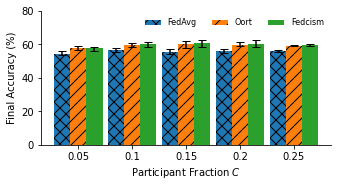

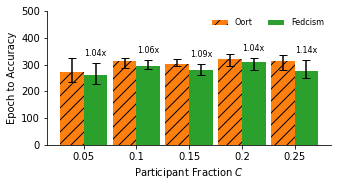

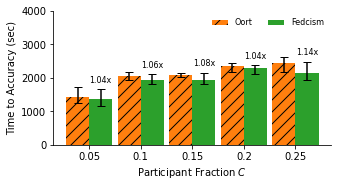

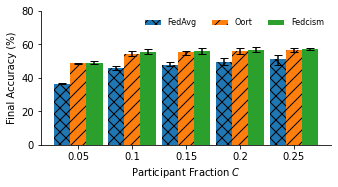

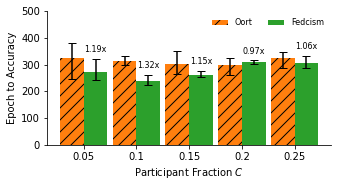

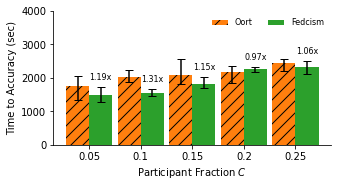

In [11]:
data_distr = 'zipf' # htail, cus
VI = 5
epoch = 500
fig_zoom = 0.3

# compare over datasets
acc_threshold = 95
x_labels = [0.05, 0.1, 0.15, 0.2, 0.25]
y_labels = ['Final Accuracy (%)',
            'Epoch to Accuracy',
            'Time to Accuracy (sec)']
y_lim = [80, epoch, 4000]
'''
y_labels = ['Final Accuracy(%)',
            'Epoch to Reach {}% Best Acc'.format(acc_threshold),
            'Time to Reach {}% Best Acc'.format(acc_threshold)]
'''
legends = {'fedavg':'FedAvg', 'oort_e0.8':'Oort', 'algo3_deg1_e0.8_wof100':'Fedcism'}
textures = ['xx', '//', None]

for dataset in ['cifar10']:
    for shard_per_user in [10, 2]:
        # new fig set
        metrics = {'ACC':[], 'ETA':[], 'TTA':[]}

        for frac in x_labels:
            bacc_stack = []
            TTAe_stack = []
            TTAt_stack = []

            for RUN in range(3):

                data_distr_file = '{}_dict_users_vi{}_r{}.pkl'.format(data_distr, VI, RUN)
                result_folder = 'cossim_{}_vi{}_r{}'.format(data_distr, VI, RUN)

                algos, color_algos, bacc_algos, required_time = get_exp_result(
                dataset, data_distr, VI, RUN, data_distr_file, result_folder, legends,
                shard_per_user, frac, acc_threshold, show_fig=False, save=False)

                bacc_stack.append(bacc_algos)
                TTAe_stack.append(required_time['epoch'])
                TTAt_stack.append(required_time['time_simu'])

            metrics['ACC'].append(bacc_stack)
            metrics['ETA'].append(TTAe_stack)
            metrics['TTA'].append(TTAt_stack)

        # summary 
        x = np.arange(len(x_labels))
        for i, (k, v) in enumerate(metrics.items()):
            fig, ax = plt.subplots(figsize=(16*fig_zoom, 9*fig_zoom))
            if data_distr == 'cus': # alias
                fig_name = '{}_{}_xc_vi{}_s{}'.format(k, 'sparsez', VI, shard_per_user)
            else:            
                fig_name = '{}_{}_xc_vi{}_s{}'.format(k, data_distr, VI, shard_per_user)
            fig_path = os.path.join('save', dataset, 'fig', fig_name)

            #plt.title(fig_name, y=1.1)

            cur_algos = algos
            cur_v_T = v_T = np.array(v).T
            if 'TA' in k:
                cur_algos = algos[1:]
                cur_v_T = v_T[1:] # [algo][run][data_config]
            for aidx, algo in enumerate(cur_algos):
                w = 0.9/len(cur_algos)
                y_avg = cur_v_T[aidx].mean(axis=0)
                y_max = cur_v_T[aidx].max(axis=0)
                y_min = cur_v_T[aidx].min(axis=0)
                y_err = np.vstack((y_max-y_avg, y_avg-y_min))

                if k == 'ACC':
                    p = ax.bar(x+aidx*w-0.45+w/2, y_avg, yerr=y_err, 
                                label=legends[algo], width=w,
                                capsize=4, hatch=textures[aidx])
                else:
                    p = ax.bar(x+aidx*w-0.45+w/2, y_avg, yerr=y_err, 
                                label=legends[algo], width=w, color=color_algos[aidx+1],
                                capsize=4, hatch=textures[aidx+1])

                    if aidx == 0:
                        base_yavg = y_avg
                    elif aidx == 1:
                        txt = ['{:.2f}x'.format(x) for x in base_yavg/y_avg]
                        ax.bar_label(p, labels=txt, padding=5, fontsize=8)

            ax.set_ylabel(y_labels[i])
            ax.set_xlabel('Participant Fraction $C$')
            ax.set_ylim(top=y_lim[i])
            ax.set_xticks(x, labels=x_labels)#, rotation='vertical')
            #fig.legend(fancybox=True, shadow=True, fontsize=16,
            #                      loc='lower left', bbox_to_anchor=(1, 0))
            ax.legend(fontsize=8, ncol=len(cur_algos), frameon=False)

            # Hide the right and top spines
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            fig.tight_layout()
            fig.savefig('{}.{}'.format(fig_path, 'png'), format='png', transparent=True)
            fig.savefig('{}.{}'.format(fig_path, 'eps'), format='eps', transparent=True)